In [1]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output
#importing Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#!jupyter nbextension install --sys-prefix --symlink --overwrite --py voila-gridstack
#!jupyter serverextension enable voila --sys-prefix

In [3]:
#load dataset
df = pd.read_csv("top_1000_movies.csv")
columns = ['Movie_id', 'Series_Title', 'Genre', 'IMDB_Rating','Director', 'Star1', 'Star2', 'Star3', 'Star4']
movie_list = df['Series_Title']

In [4]:
def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
        important_features.append(data['Series_Title'][i] + ' ' + data['Genre'][i] + ' ' + str(data['IMDB_Rating'][i])  + ' ' 
                                  + data['Director'][i] + ' ' + data['Star1'][i]+ ' ' + data['Star2'][i]+ ' ' 
                                  + data['Star3'][i]+ ' ' + data['Star4'][i])
    return important_features

In [5]:
def movie_rec(movie_name):
    df = pd.read_csv("top_1000_movies.csv")
    df['important_features'] = get_important_features(df)
    cm = CountVectorizer().fit_transform(df['important_features'])
    cs = cosine_similarity(cm)
    movie_id = df[df.Series_Title == movie_name]['Movie_id'].values[0]
    scores = list(enumerate(cs[movie_id]))
    sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    sorted_scores = sorted_scores[1:]
    
    j = 0
    print('If you liked', movie_name, ' you might also be interested in these 10 movies:\n')

    for items in sorted_scores:
        movie_title = df[df.Movie_id == items[0]]['Series_Title'].values[0]
        print(j+1, movie_title)
        j = j+1
        if j > 9:
            break
def rating_calc(rating):
    average = 0
    for i in range(len(rating)):
        average = rating[i] + average
    average = average/len(rating)
    rounded = round(average, 2)
    print('The current rating of the movie recommendation system based on user feedback is ' + str(rounded))

In [6]:

label_headline = widgets.HTML(value="<h1>Movie Recommendation System(Predictive Model)</h1>")
label_explaination = widgets.HTML(value="<p>To use the movie recommendation below, please select a movie from the list. After your selection, you will the top five movies similar to your selection. </p>")
jump = widgets.HTML(value = "<a href='#GenreDist' color:Blue>Genre Distribution</a> | <a href='#TopDirector' color:Blue>Top 10 Directors</a> | <a href='#IMDB' color:Blue>IMDB Rating Vs. Meta Score</a>")
choose_movie = widgets.Dropdown(layout={'width': '500px'},
    options= df['Series_Title'],
    value= None ,
    description='Pick a Movie: ',
)
rating = []
display(label_headline)
display(jump)
display(label_explaination)
display(choose_movie)
output = widgets.Output()
display(output)

@output.capture()
def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        movie_rec(change['new'])
        
        

choose_movie.observe(on_change)





HTML(value='<h1>Movie Recommendation System(Predictive Model)</h1>')

HTML(value="<a href='#GenreDist' color:Blue>Genre Distribution</a> | <a href='#TopDirector' color:Blue>Top 10 …

HTML(value='<p>To use the movie recommendation below, please select a movie from the list. After your selectio…

Dropdown(description='Pick a Movie: ', layout=Layout(width='500px'), options=('The Shawshank Redemption', 'The…

Output()

In [1]:
rating_headline = widgets.HTML(value="<h1>Rating System (Machine Learning Algorithm Accuracy Tracker)</h1>")
rating_explaination = widgets.HTML(value="<p>The dropbox below is an example of the accuracy tracking function for the movie recommendation system. It records user feedback from their recommendation ratings, and then calculate the average. </p>")

feedback = widgets.Dropdown(layout={'width': '200px'},
    options= [1, 2, 3, 4, 5],
    value= None ,
    description='Rate Us: ',
)
display(rating_headline)
display(rating_explaination)
display(feedback)
output = widgets.Output()
display(output)

@output.capture()
def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        rating.append(change['new'])
        rating_calc(rating)

feedback.observe(on_change)

NameError: name 'widgets' is not defined

HTML(value="<a id='GenreDist'></a><h2>Genre Distribution</h2>")

HTML(value='<p>The graph below contains the genre distribution of the movies currently on the database. In the…

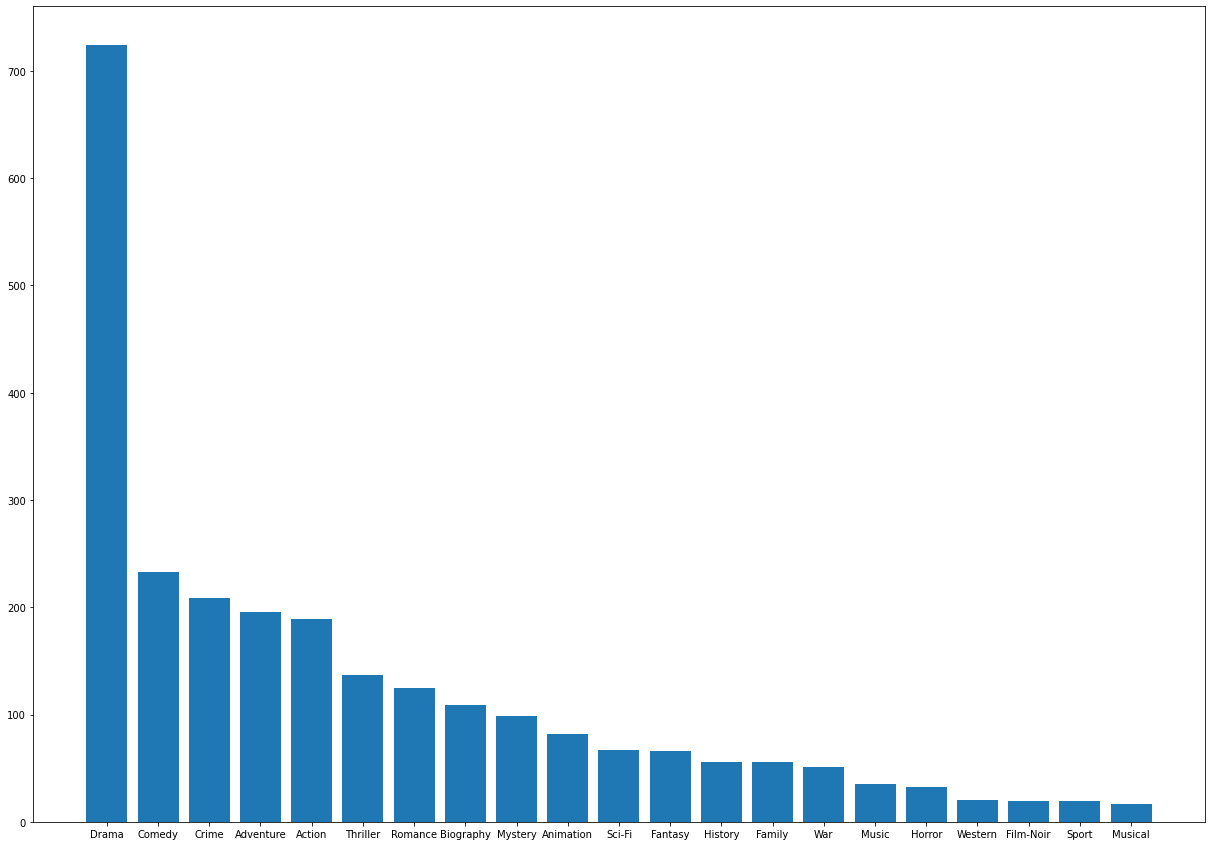

In [8]:
label_headline2 = widgets.HTML(value="<a id='GenreDist'></a><h2>Genre Distribution</h2>")
label_explaination2 = widgets.HTML(value="<p>The graph below contains the genre distribution of the movies currently on the database. In the future it could be used to determine what genres needed to be added to our streaming services so the distribution is not skewed. So that our services can appeal to a wider audience. </p>")

display(label_headline2)
display(label_explaination2)
dummy = df['Genre'].str.get_dummies(sep=', ')
genre_distribution = dummy.sum().sort_values(ascending=False).index.values
genre_count = dummy.sum().sort_values(ascending=False).values
fig, (ax1) = plt.subplots(figsize=(21, 15))
ax1 = plt.bar(genre_distribution, genre_count)

HTML(value="<a id='TopDirector'></a><h2>Top 10 Directors by Gross Earnings</h2>")

HTML(value='<p>The graph below contains the top 10 directors based on their movies gross earnings. </p>')

Text(0.5, 1.0, 'Top 10 Directors Gross Earnings')

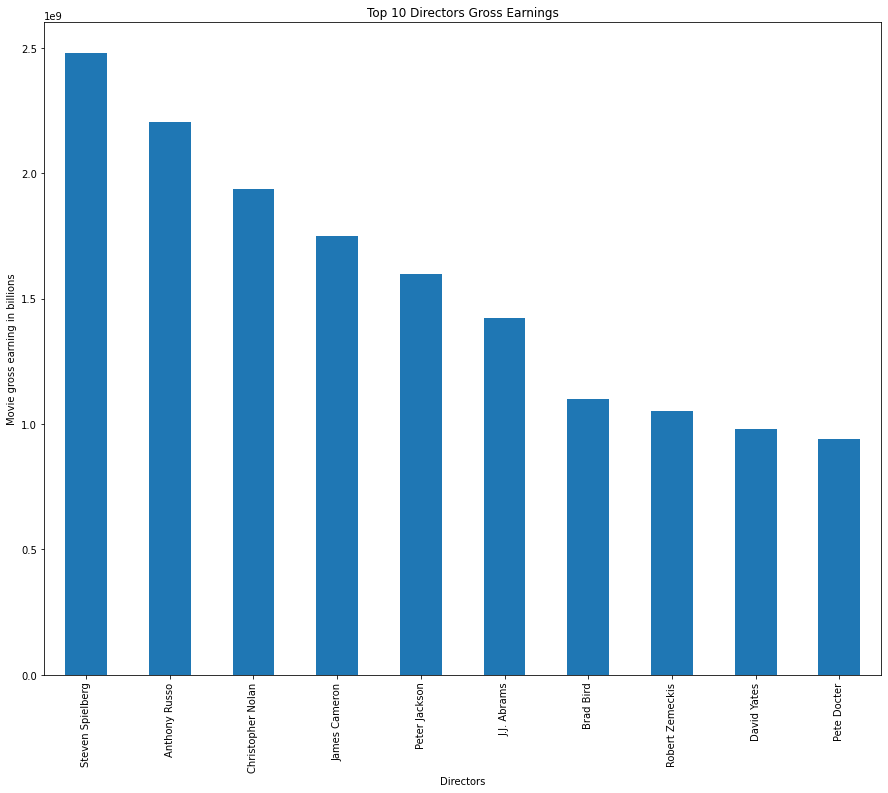

In [9]:
label_headline3 = widgets.HTML(value="<a id='TopDirector'></a><h2>Top 10 Directors by Gross Earnings</h2>")
label_explaination3 = widgets.HTML(value="<p>The graph below contains the top 10 directors based on their movies gross earnings. </p>")

display(label_headline3)
display(label_explaination3)
gross_by_director = df['Gross'].groupby(df['Director']).sum().sort_values(ascending=False).head(10)
gross_by_director.plot.bar(figsize=(15, 12))
plt.xlabel("Directors")
plt.ylabel("Movie gross earning in billions")
plt.title('Top 10 Directors Gross Earnings')


HTML(value="<a id='IMDB'></a><h2>IMDB Rating Vs. Meta Score by Gross Earnings  </h2>")

HTML(value='<p>The graph below compares the top 10 movies based on Meta scores and IMDB rating to their gross …

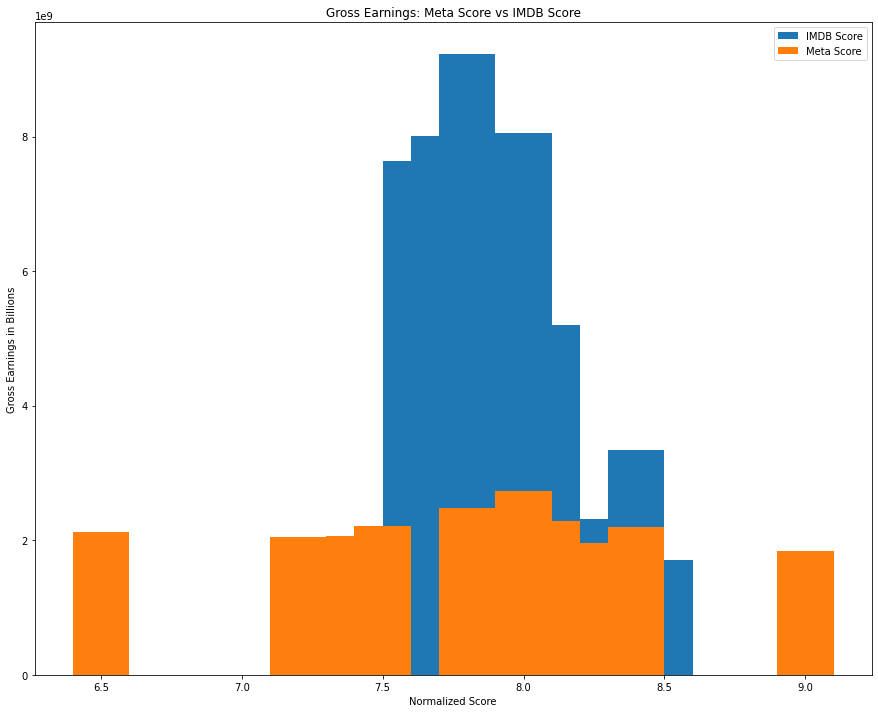

In [10]:
label_headline4 = widgets.HTML(value="<a id='IMDB'></a><h2>IMDB Rating Vs. Meta Score by Gross Earnings  </h2>")
label_explaination4 = widgets.HTML(value="<p>The graph below compares the top 10 movies based on Meta scores and IMDB rating to their gross earnings. </p>")
display(label_headline4)
display(label_explaination4)

gross_by_imdb_key = df['Gross'].groupby(df['IMDB_Rating']).sum().sort_values(ascending=False).head(10).index.values
gross_by_meta_key = df['Gross'].groupby(df['Meta_score']).sum().sort_values(ascending=False).head(10).index.values
gross_by_imdb = df['Gross'].groupby(df['IMDB_Rating']).sum().sort_values(ascending=False).head(10).values
gross_by_meta = df['Gross'].groupby(df['Meta_score']).sum().sort_values(ascending=False).head(10).values


bar_width = 0.2
fig, ax = plt.subplots(figsize=(15, 12))
summer = ax.bar(gross_by_imdb_key, gross_by_imdb, bar_width,label="IMDB Score")

Winter = ax.bar(gross_by_meta_key/10, gross_by_meta, bar_width,label="Meta Score")
ax.set_xlabel('Normalized Score')
ax.set_ylabel('Gross Earnings in Billions')
ax.set_title('Gross Earnings: Meta Score vs IMDB Score')
ax.legend()